In [18]:
import pandas as pd

In [5]:
data = pd.read_csv('DataCoSupplyChainDataset.csv',header= 0,encoding='unicode_escape')
pd.set_option('display.max_columns',None)
data.head()
data.df = data

/var/folders/_6/npcph_p120l51mysny2fwtmh0000gn/T/ipykernel_46693/2148968.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.df = data


In [15]:
data.size

9567507

In [17]:
data.info

<bound method DataFrame.info of             Type  Days for shipping (real)  Days for shipment (scheduled)  \
0          DEBIT                         3                              4   
1       TRANSFER                         5                              4   
2           CASH                         4                              4   
3          DEBIT                         3                              4   
4        PAYMENT                         2                              4   
...          ...                       ...                            ...   
180514      CASH                         4                              4   
180515     DEBIT                         3                              2   
180516  TRANSFER                         5                              4   
180517   PAYMENT                         3                              4   
180518   PAYMENT                         4                              4   

        Benefit per order  Sales per custom

In [19]:
data.dropna

<bound method DataFrame.dropna of             Type  Days for shipping (real)  Days for shipment (scheduled)  \
0          DEBIT                         3                              4   
1       TRANSFER                         5                              4   
2           CASH                         4                              4   
3          DEBIT                         3                              4   
4        PAYMENT                         2                              4   
...          ...                       ...                            ...   
180514      CASH                         4                              4   
180515     DEBIT                         3                              2   
180516  TRANSFER                         5                              4   
180517   PAYMENT                         3                              4   
180518   PAYMENT                         4                              4   

        Benefit per order  Sales per cust

In [22]:
# 삭제할 칼럼 리스트
columns_to_drop = [
    'Customer Email', 'Customer Password', 'Customer Fname', 
    'Customer Lname', 'Product Description', 'Product Image', 'Product Status'
]

# 불필요한 칼럼 삭제
cleaned_data = data.drop(columns=columns_to_drop)

# 삭제 후 데이터 확인
cleaned_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,Smart watch,327.750000,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,Smart watch,327.750000,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,Smart watch,327.750000,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,Smart watch,327.750000,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,Smart watch,327.750000,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,1005,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.000000,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,9141,Corporate,CA,7330 Broad Apple Moor,93304.0,7,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Japón,9141,1/16/2016 1:34,26037,1004,4.000000,0.01,65161,399.980011,-1.55,1,399.980011,395.980011,-613.770019,Eastern Asia,Osaka,COMPLETE,NaN,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,EE. UU.,291,Corporate,CT,97 Burning Landing,6010.0,7,Fan Shop,41.629959,-72.967155,Pacific Asia,Adelaide,Australia,291,1/15/2016 21:00,260

In [24]:
cleaned_data.describe

<bound method NDFrame.describe of             Type  Days for shipping (real)  Days for shipment (scheduled)  \
0          DEBIT                         3                              4   
1       TRANSFER                         5                              4   
2           CASH                         4                              4   
3          DEBIT                         3                              4   
4        PAYMENT                         2                              4   
...          ...                       ...                            ...   
180514      CASH                         4                              4   
180515     DEBIT                         3                              2   
180516  TRANSFER                         5                              4   
180517   PAYMENT                         3                              4   
180518   PAYMENT                         4                              4   

        Benefit per order  Sales per cust

In [50]:
# Order Profit per Order 탐구 (가설: 상품판매이윤이 아닌, 운송운임의 이윤일 것으로 생각하고 상관계수 구함)
shipping_columns = ['Days for shipping (real)','Late_delivery_risk', 'Order Profit Per Order']
shipping_corr = cleaned_data[shipping_columns].corr()
shipping_corr

,Days for shipping (real),Late_delivery_risk,Order Profit Per Order
Days for shipping (real),1.000000,0.401415,-0.005101
Late_delivery_risk,0.401415,1.000000,-0.003727
Order Profit Per Order,-0.005101,-0.003727,1.000000


In [42]:
# Shipping Mode를 숫자로 변환
cleaned_data['Shipping Mode Code'] = cleaned_data['Shipping Mode'].astype('category').cat.codes

# Shipping Mode와 이익 간의 상관관계 분석
shipping_columns = ['Shipping Mode Code', 'Order Profit Per Order']
shipping_corr = cleaned_data[shipping_columns].corr()

shipping_corr

,Shipping Mode Code,Order Profit Per Order
Shipping Mode Code,1.000000,-0.002422
Order Profit Per Order,-0.002422,1.000000


In [48]:
# Order Profit per Order 탐구 (가설: 운송운임이윤이 아닌, 매출의 이윤일 것으로 생각하고 상관계수 구함)
sales_columns = ['Sales per customer', 'Sales', 'Order Item Discount Rate', 'Order Profit Per Order']
sales_corr = cleaned_data[sales_columns].corr()
sales_corr

,Sales per customer,Sales,Order Item Discount Rate,Order Profit Per Order
Sales per customer,1.000000,0.989744,-0.119469,0.133484
Sales,0.989744,1.000000,0.000346,0.131816
Order Item Discount Rate,-0.119469,0.000346,1.000000,-0.018644
Order Profit Per Order,0.133484,0.131816,-0.018644,1.000000


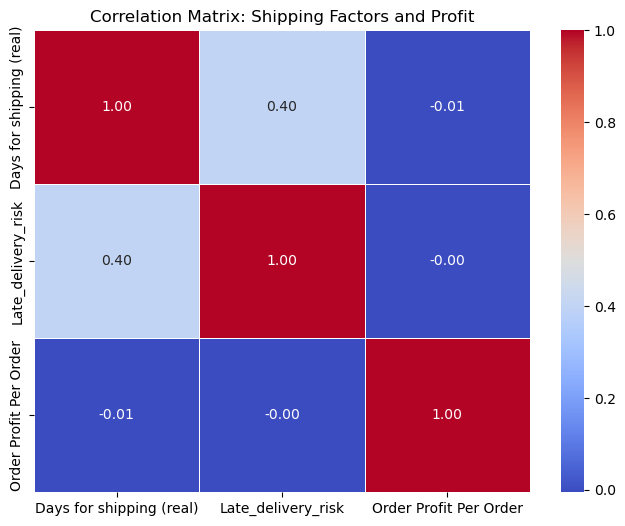

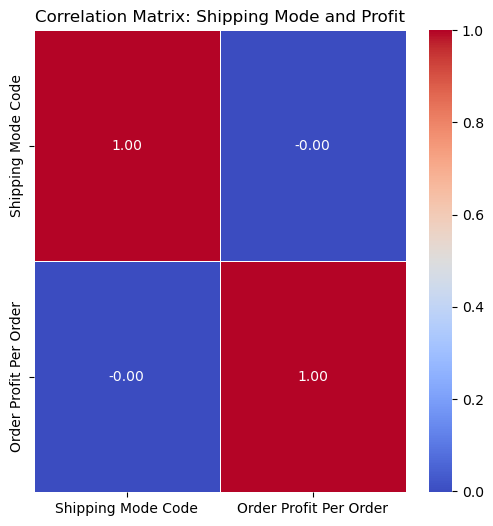

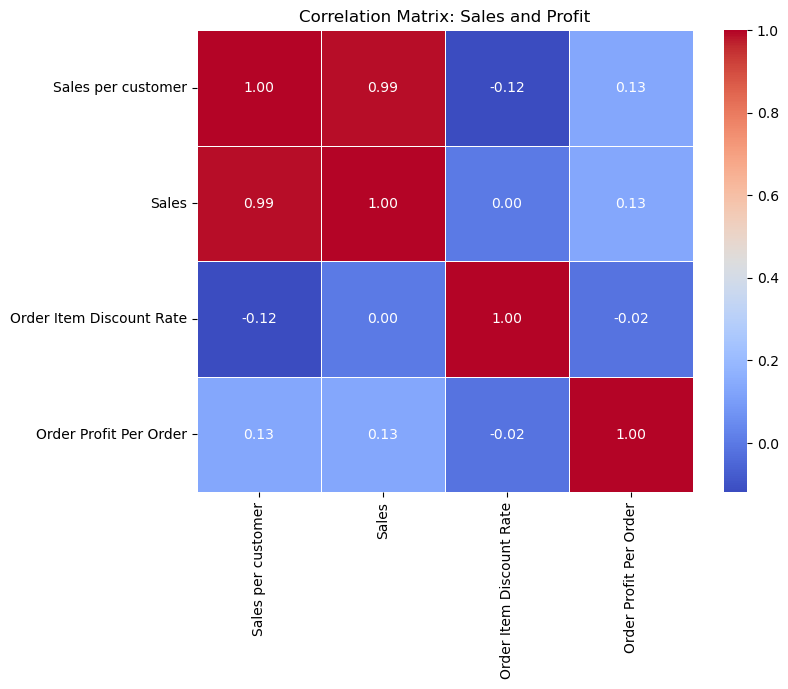

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Shipping 관련 상관계수 시각화
shipping_columns = ['Days for shipping (real)', 'Late_delivery_risk', 'Order Profit Per Order']
shipping_corr = cleaned_data[shipping_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(shipping_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Shipping Factors and Profit')
plt.show()

# 2. Shipping Mode와 이익 간 상관관계 시각화
cleaned_data['Shipping Mode Code'] = cleaned_data['Shipping Mode'].astype('category').cat.codes
shipping_columns_mode = ['Shipping Mode Code', 'Order Profit Per Order']
shipping_corr_mode = cleaned_data[shipping_columns_mode].corr()

plt.figure(figsize=(6, 6))
sns.heatmap(shipping_corr_mode, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Shipping Mode and Profit')
plt.show()

# 3. 매출 관련 상관계수 시각화
sales_columns = ['Sales per customer', 'Sales', 'Order Item Discount Rate', 'Order Profit Per Order']
sales_corr = cleaned_data[sales_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(sales_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Sales and Profit')
plt.show()

/var/folders/_6/npcph_p120l51mysny2fwtmh0000gn/T/ipykernel_46693/2744710368.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Shipping Mode', y='Order Profit Per Order', data=shipping_mode_profit, palette='Blues_d')


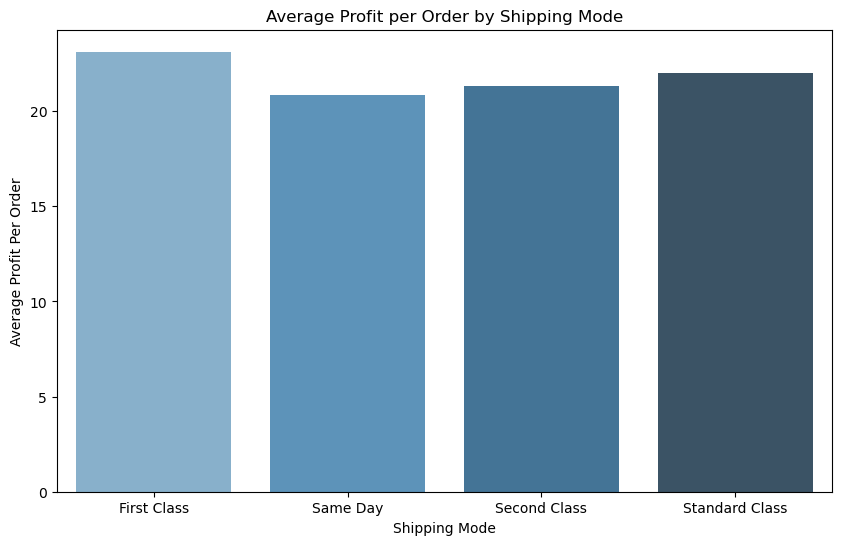

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Shipping Mode별 평균 OPPO 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Shipping Mode', y='Order Profit Per Order', data=shipping_mode_profit, palette='Blues_d')
plt.title('Average Profit per Order by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Profit Per Order')
plt.show()

In [58]:
# 제품 카테고리별 수익성 분석 ('Product Category Id', 'Category Name' 기준으로 그룹화하고 'Order Profit Per Order' 합계 계산)
category_profitability = cleaned_data.groupby(['Product Category Id', 'Category Name'])['Order Profit Per Order'].sum().reset_index()

# 수익성을 기준으로 내림차순 정렬
category_profitability = category_profitability.sort_values(by='Order Profit Per Order', ascending=False)

category_profitability

,Product Category Id,Category Name,Order Profit Per Order
30,45,Fishing,756220.767190
12,17,Cleats,494636.919791
28,43,Camping & Hiking,427455.568106
6,9,Cardio Equipment,383011.098485
14,24,Women's Apparel,350421.029567
32,48,Water Sports,325146.960038
31,46,Indoor/Outdoor Games,318451.430554
13,18,Men's Footwear,311902.820214
16,29,Shop By Sport,129813.960315
38,64,Computers,69656.810171


/var/folders/_6/npcph_p120l51mysny2fwtmh0000gn/T/ipykernel_46693/2539691298.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Profit Per Order', y='Category Name', data=top_10_categories, palette='Blues_d')


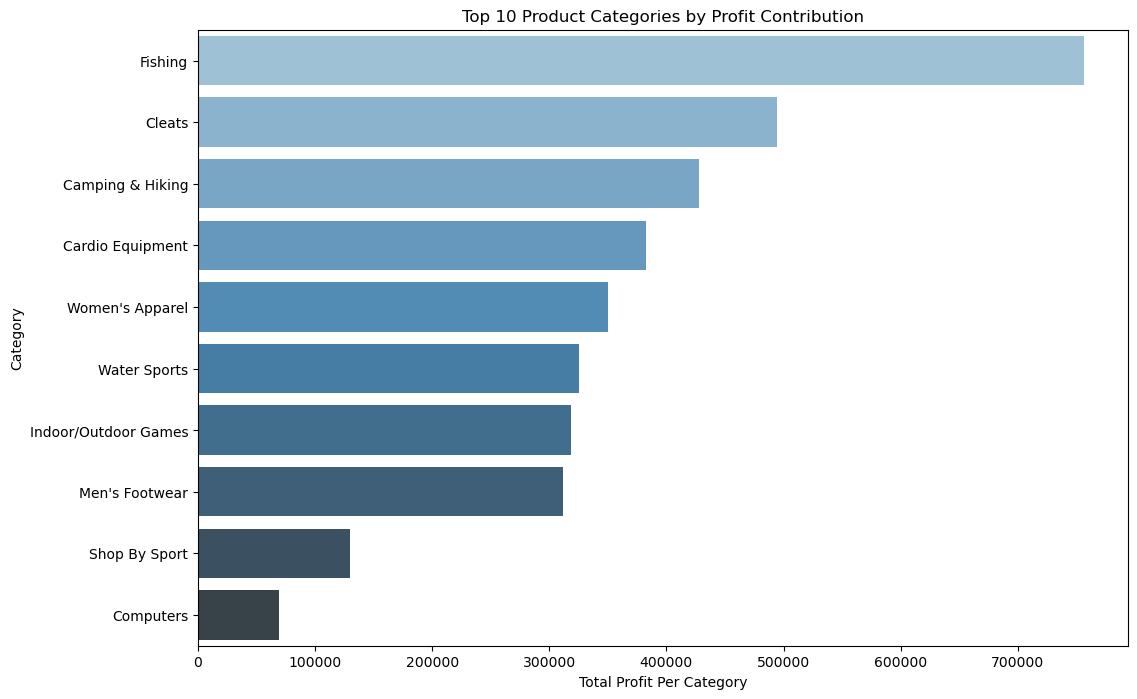

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

## 이익기여도가 높은 제품 카테고리
# 상위 10개 제품 카테고리 선택
top_10_categories = category_profitability.head(10)

# 제품 카테고리별 수익 기여도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Order Profit Per Order', y='Category Name', data=top_10_categories, palette='Blues_d')
plt.title('Top 10 Product Categories by Profit Contribution')
plt.xlabel('Total Profit Per Category')
plt.ylabel('Category')
plt.show()

In [62]:
# 'Order Profit Per Order' 분포에 대한 기본 통계 정보 확인
profit_stats = cleaned_data['Order Profit Per Order'].describe()
profit_stats

count    180519.000000
mean         21.974989
std         104.433526
min       -4274.979980
25%           7.000000
50%          31.520000
75%          64.800003
max         911.799988
Name: Order Profit Per Order, dtype: float64

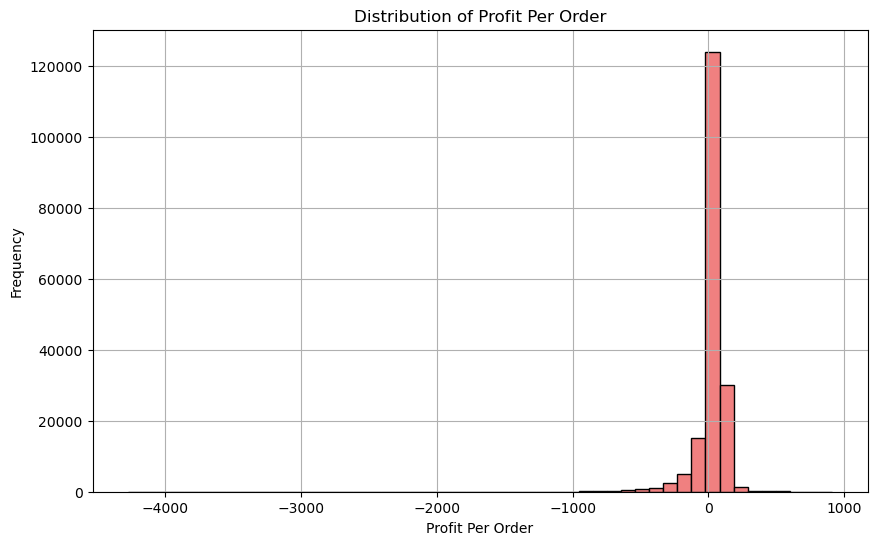

In [84]:
# 주문당 OPPO 분포 분석
plt.figure(figsize=(10, 6))

# 'Order Profit Per Order' 컬럼의 분포를 히스토그램으로 시각화
plt.hist(cleaned_data['Order Profit Per Order'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribution of Profit Per Order')
plt.xlabel('Profit Per Order')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [72]:
# 지역별 수익성 분석 ('Order Region' 기준으로 그룹화하고 'Order Profit Per Order' 합계 계산)
region_profitability = cleaned_data.groupby('Order Region')['Order Profit Per Order'].sum().reset_index()

# 수익성을 기준으로 내림차순 정렬
region_profitability = region_profitability.sort_values(by='Order Profit Per Order', ascending=False)

region_profitability

,Order Region,Order Profit Per Order
22,Western Europe,625446.080548
3,Central America,616341.570651
12,South America,335154.400817
10,Northern Europe,233450.600647
17,Southern Europe,230829.229883
15,Southeast Asia,211342.819786
11,Oceania,201478.020484
1,Caribbean,171825.640024
13,South Asia,165703.900124
21,West of USA,164940.660455


/var/folders/_6/npcph_p120l51mysny2fwtmh0000gn/T/ipykernel_46693/776313928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Profit Per Order', y='Order Region', data=region_profitability, palette='Blues_d')


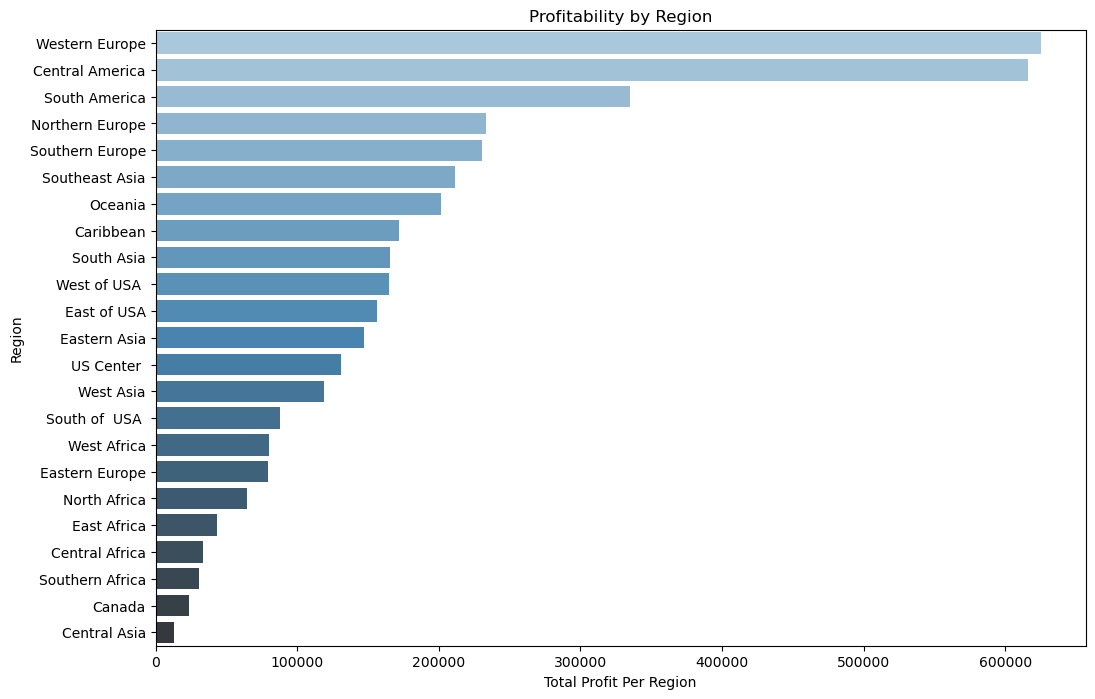

In [82]:
# Region별 수익성 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Order Profit Per Order', y='Order Region', data=region_profitability, palette='Blues_d')
plt.xlabel('Total Profit Per Region')
plt.ylabel('Region')
plt.title('Profitability by Region')
plt.show()